## 1. Read the picture S2_2.

In [2]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

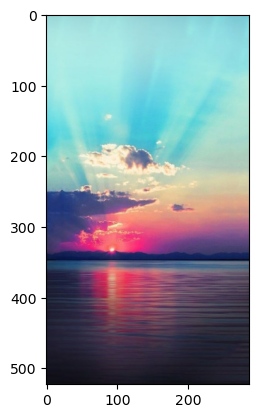

In [3]:
image = io.imread('S2_2.png')
plt.imshow(image)
plt.show()

## 2. Print out the observed shape of the image

In [4]:
image.shape

(523, 287, 3)

## 3. Show Vertically One-third of the image in Green next one-third in Red and the last one third in Blue

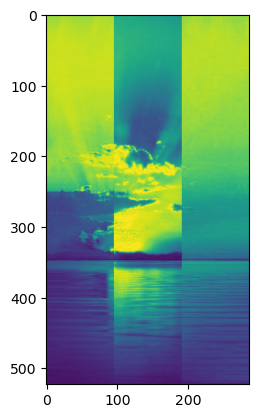

In [5]:
rgb_img = np.zeros((523, 287), dtype=np.uint8)
rgb_img[:, :96] = image[:, :96, 1]
rgb_img[:, 96:192] = image[:, 96:192, 0]
rgb_img[:, 192:] = image[:, 192:, 2]

plt.imshow(rgb_img)
plt.show()

## 4. Tilt the image horizontally horizontal lines on the image (by matrix transformation)

In [6]:
V1 = np.array([[1, -.5, 0], [0, 1, 0], [0, 0, 1]])

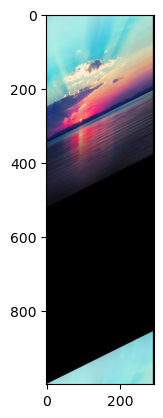

In [7]:
tilt_image = np.zeros((1000, 290, 3), dtype=np.uint8)

for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = image[i, j, :]

    input_coord = np.array([i, j, 1])
    i_out, j_out, _ = (V1 @ input_coord).astype(int)
    tilt_image[i_out, j_out, :] = pixel_data

plt.imshow(tilt_image)
plt.show()

## 5. Draw vertical lines on the image (by matrix transformation)

In [8]:
V1 = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 1]])
V1

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

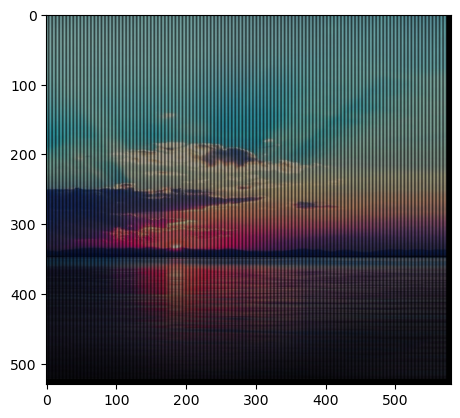

In [9]:
ver_img = np.zeros((530, 580, 3), dtype=np.uint8)

for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = image[i, j, :]
    input_coord = np.array([i, j, 1])

    i_out, j_out, _ = (V1 @ input_coord).astype(int)
    ver_img[i_out, j_out, :] = pixel_data
  
plt.imshow(ver_img)
plt.show()

## 6. Scale down the image by one-fourth

In [10]:
S = np.array([[1/4, 0, 0], [0, 1/4, 0], [0, 0, 1]])

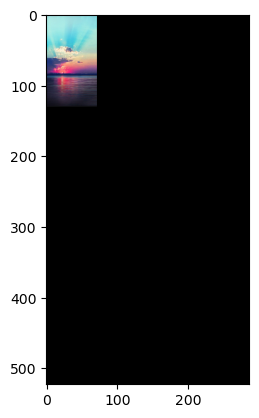

In [11]:
scale_img = np.zeros((523, 287, 3), dtype=np.uint8)

for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = image[i, j, :]
    input_coord = np.array([i, j, 1])

    i_out, j_out, _ = (S @ input_coord).astype(int)
    scale_img[i_out, j_out, :] = pixel_data

plt.imshow(scale_img)
plt.show()

## 7. Rotate the image side-wise

In [12]:
from PIL import Image

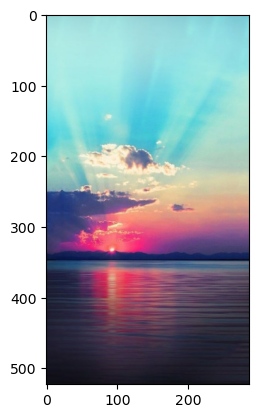

In [13]:
im = Image.open('S2_2.png')
plt.imshow(im)

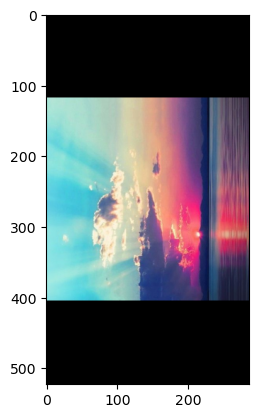

In [14]:
ro = im.rotate(90)
plt.imshow(ro)
plt.show()

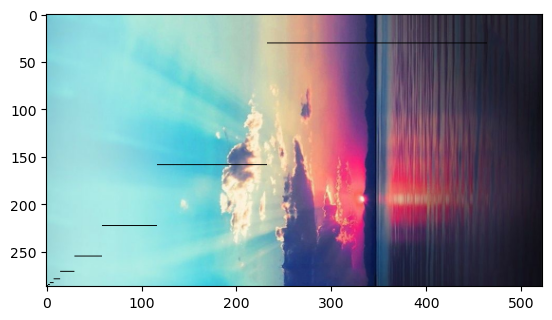

In [15]:
def rotate(angel):
  angel = np.radians(angel)
  return np.array([
    [np.cos(angel), -np.sin(angel), 0],
    [np.sin(angel), np.cos(angel), 0],
    [0, 0, 1]
  ])

R = rotate(90)

rotate_img = np.zeros((287, 523, 3), dtype=np.uint8)

for i, row in enumerate(image):
  for j, col in enumerate(row):

    pixel_data = image[i, j, :]
    input_coord = np.array([i, j, 1])
    i_out, j_out, _ = (R @ input_coord).astype(int)
    rotate_img[i_out, j_out, :] = pixel_data

plt.imshow(rotate_img)
plt.show()

## 8. Make a mirror image of the actual pictual picture

In [16]:
M = np.array([
  [1, 0, 0],
  [0, -1, 0],
  [0, 0, 1]
])
M

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

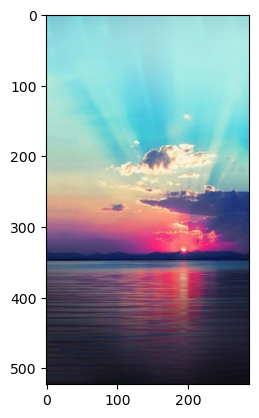

In [17]:
mirr = np.zeros(( 523, 287, 3), dtype=np.uint8)

for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = image[i, j, :]
    input_cord = np.array([i, j, 1])
    i_out, j_out, _ = (M @ input_cord).astype(int)
    mirr[i_out, j_out, :] = pixel_data

plt.imshow(mirr)
plt.show()

## 9. Intensify the image

In [18]:
I = np.array([
  [0, 0, 0], 
  [0, 20, 0],
  [0, 0, 0]
])
I

array([[ 0,  0,  0],
       [ 0, 20,  0],
       [ 0,  0,  0]])

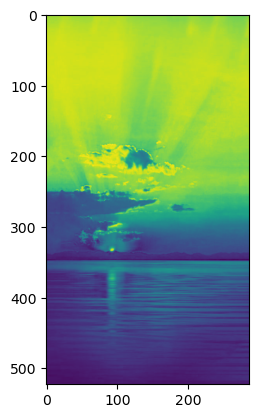

In [21]:
# int_img = np.zeros(( 523, 287, 3), dtype=np.uint8)
res = []
for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = np.sum(np.multiply(image[i, j], I))
    res.append(pixel_data)

res = np.array(res)
int_img = res.reshape(523, 287)
plt.imshow(int_img)
plt.show()

## 10. Detect the edge of the actual Picture

In [22]:
I = np.array([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0]
])

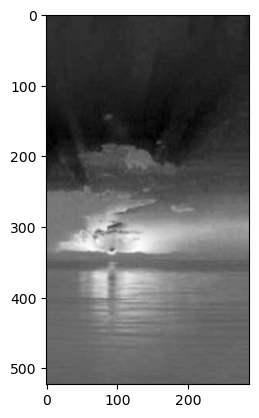

In [26]:
res = []
for i, row in enumerate(image):
  for j, col in enumerate(row):
    pixel_data = np.sum(np.multiply(image[i, j], I))
    res.append(pixel_data)

res = np.array(res)
int_img = res.reshape(523, 287)
plt.imshow(int_img, cmap='Greys_r')
plt.show()

##-------------------------------------------------Happy Learning-----------------------------------------------------------